In [12]:
import torch
import settings
import fastai.vision

torch.cuda.is_available()

True

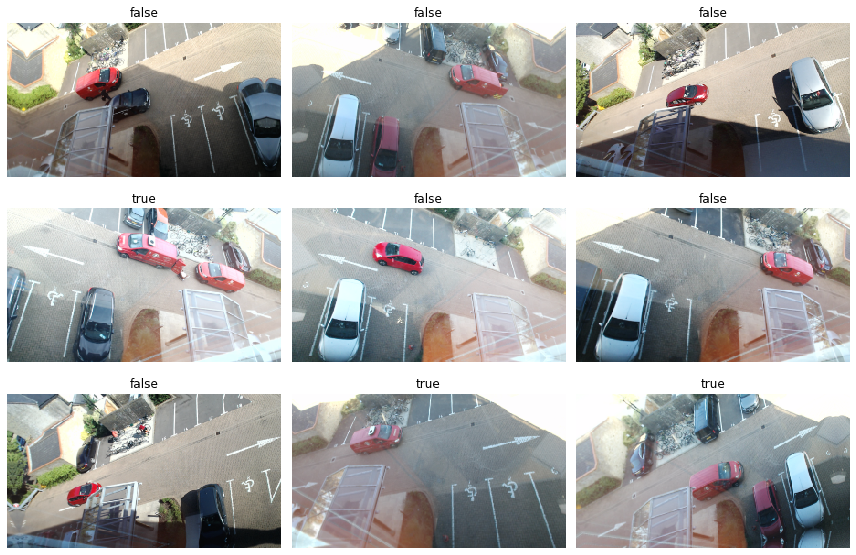

In [13]:
transformations = fastai.vision.get_transforms()
data = fastai.vision.ImageDataBunch.from_folder(
    settings.BASE_PATH, train='training', valid='validation',
    size=(169, 300), ds_tfms=transformations,
    num_workers=1,
).normalize(fastai.vision.imagenet_stats)
data.show_batch(rows=3, figsize=(12, 8))

In [14]:
learn = fastai.vision.cnn_learner(data, fastai.vision.models.resnet18, metrics=fastai.vision.accuracy)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.135789,0.467650,0.835580,02:08
1,0.756772,0.434713,0.861635,02:08
2,0.581438,0.353190,0.909254,02:24
3,0.474666,0.337968,0.895777,02:26
4,0.405899,0.318737,0.891285,02:29


In [15]:
learn.save('baconbot_stage_1')

In [16]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.194605,0.136141,0.941599,02:25
1,0.172957,0.063276,0.991015,02:25
2,0.135497,0.060376,0.991015,02:27
3,0.103960,0.061319,0.985624,02:14
4,0.100660,0.065037,0.973944,02:14
5,0.096271,0.077067,0.959569,02:13


In [17]:
interpretation = fastai.vision.ClassificationInterpretation.from_learner(learn)

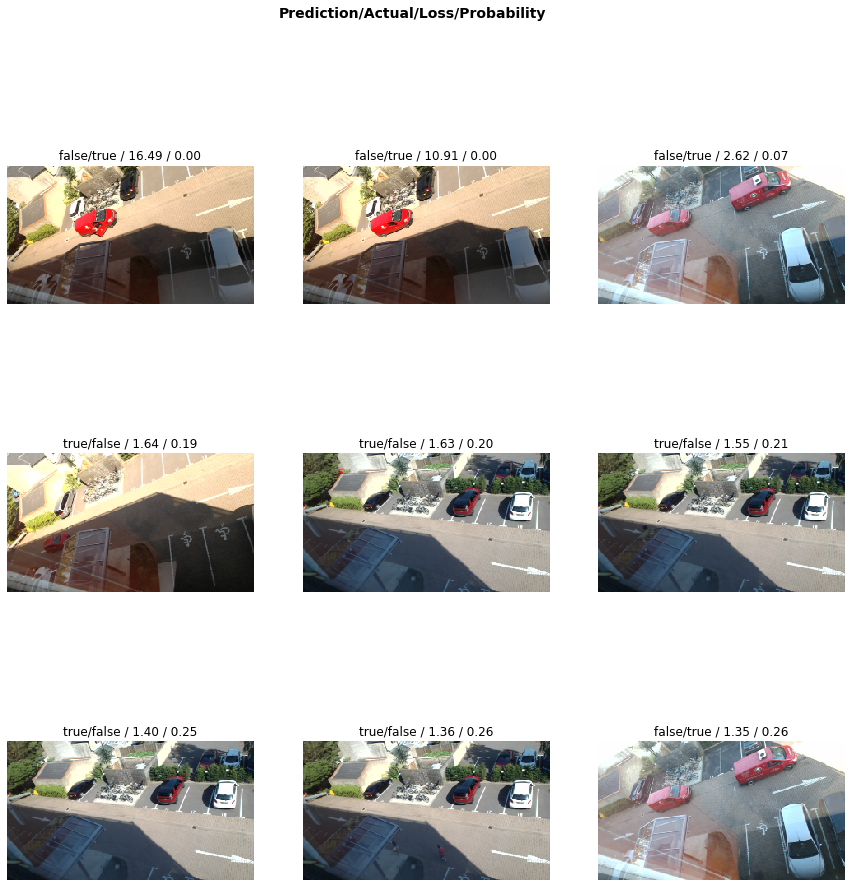

In [18]:
interpretation.plot_top_losses(9, figsize=(15, 15))

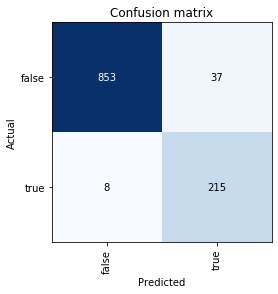

In [19]:
interpretation.plot_confusion_matrix()

In [22]:
learn.save('baconbot_stage_2')

In [23]:
learn.export('baconbot_resnet18.pkl')

In [25]:
# from fastai.widgets import DatasetFormatter, PredictionsCorrector

# most_unsure = DatasetFormatter().from_most_unsure(learn)
# wgt = PredictionsCorrector(*most_unsure)

AttributeError: 'NoneType' object has no attribute 'dataset'

In [20]:
# from fastai.widgets import DatasetFormatter, ImageCleaner

# data, idxs = DatasetFormatter().from_toplosses(learn)
# ImageCleaner(data, idxs, settings.BASE_PATH)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [21]:
# img = learn.data.train_ds[0][0]
# learn.predict(img)

(Category false, tensor(0), tensor([1.0000e+00, 4.8052e-08]))